In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Part1. Analyze results of three types of regression models applied in predicting ads effectiveness 

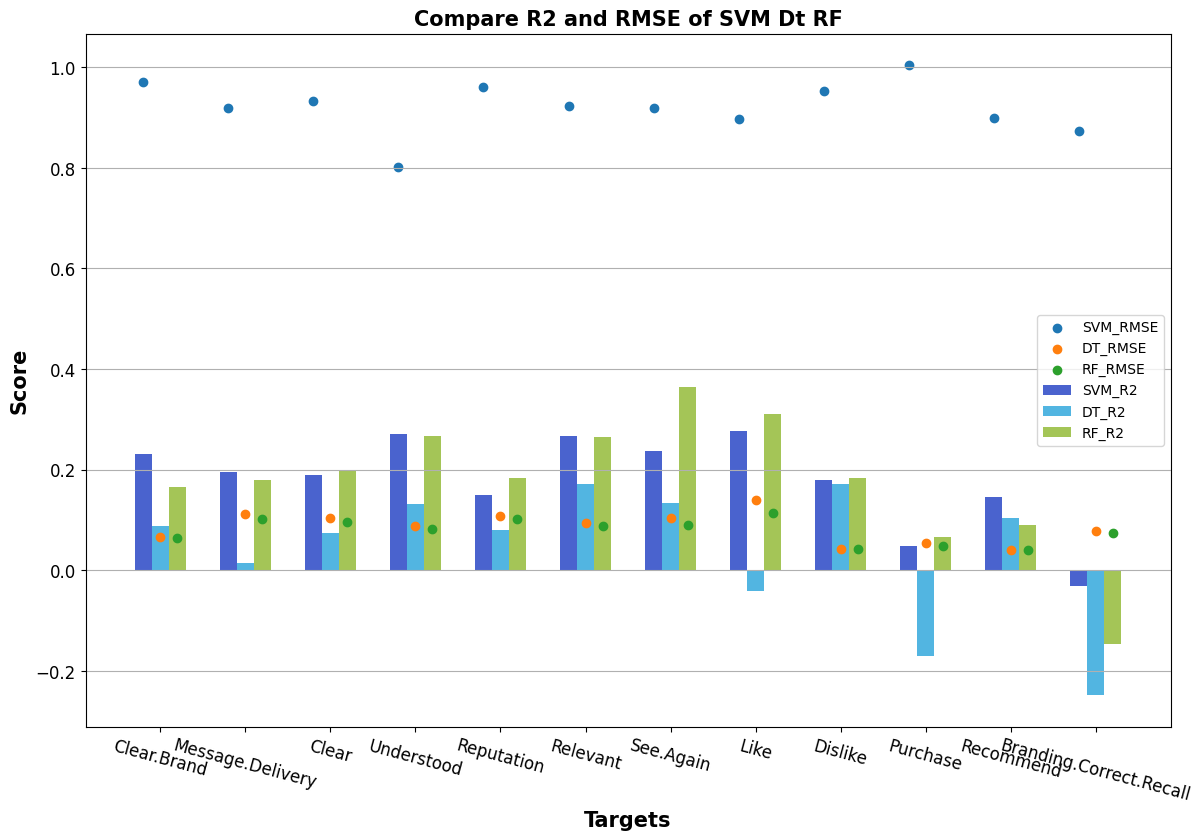

In [15]:
SVM_reg_df = pd.read_csv("./result/SVM_regression.csv")
DT_reg_df = pd.read_csv("./result/DT_optimized_regression.csv")
RF_reg_df = pd.read_csv("./result/RF_optimized_regression.csv")
labels = np.array(list(SVM_reg_df["Target"]))
x = np.array(range(12))

r2_svm = np.array(list(SVM_reg_df["R_squared_test"]))
r2_dt = np.array(list(DT_reg_df["R_squared_test"]))
r2_rf = np.array(list(RF_reg_df["R_squared_test"]))

rmse_svm = np.array(list(SVM_reg_df["RMSE_test"]))
rmse_dt = np.array(list(DT_reg_df["RMSE_test"]))
rmse_rf = np.array(list(RF_reg_df["RMSE_test"]))
fig = plt.figure(figsize=(14, 9))

plt.bar(x-0.2, r2_svm, label="SVM_R2", width=0.2, color="#4A63CE")
plt.bar(x, r2_dt, label="DT_R2", width=0.2, color="#52B5E1")
plt.bar(x+0.2, r2_rf, label="RF_R2", width=0.2, color="#A4C557")

plt.scatter(x-0.2, rmse_svm, label="SVM_RMSE")
plt.scatter(x, rmse_dt, label="DT_RMSE")
plt.scatter(x+0.2, rmse_rf, label="RF_RMSE")

plt.title("Compare R2 and RMSE of SVM Dt RF", fontdict={"size":15}, weight="bold")
plt.xlabel("Targets", fontdict={"size":15}, weight="bold")
plt.ylabel("Score", fontdict={"size":15}, weight="bold")
plt.xticks(fontsize=12, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小


plt.grid(axis="y")
plt.legend(loc="right")
# plt.savefig('./plots/R_squared_contrast.png')
plt.show()


## Part2. Analyze results of three types of classification models applied in predicting ads effectiveness 

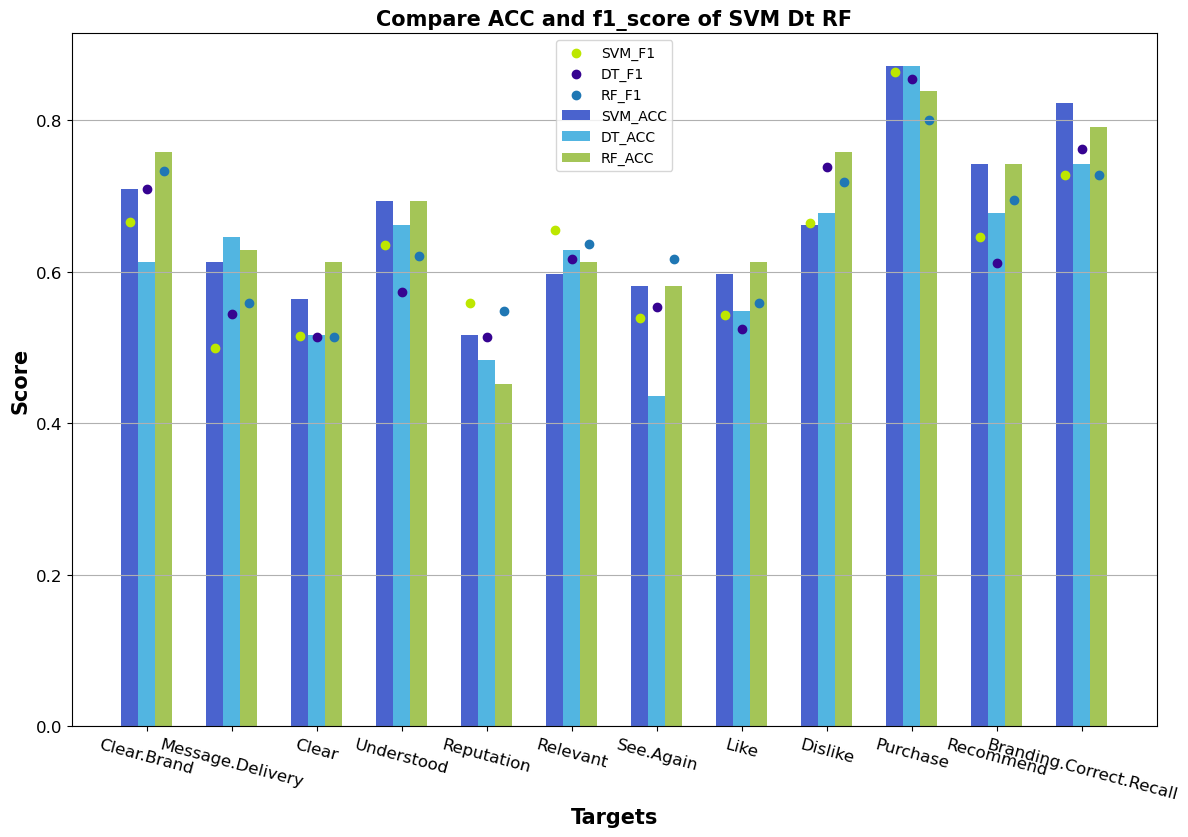

In [2]:
SVM_cla_df = pd.read_csv("./result/SVM_classification.csv")
DT_cla_df = pd.read_csv("./result/DT_optimized_classification.csv")
RF_cla_df = pd.read_csv("./result/RF_optimized_classification.csv")
labels = np.array(list(SVM_cla_df["Target"]))
x = np.array(range(12))

acc_svm = np.array(list(SVM_cla_df["acc_test"]))
acc_dt = np.array(list(DT_cla_df["acc_test"]))
acc_rf = np.array(list(RF_cla_df["acc_test"]))

f1_svm = np.array(list(SVM_cla_df["f1_score"]))
f1_dt = np.array(list(DT_cla_df["f1_score"]))
f1_rf = np.array(list(RF_cla_df["f1_score"]))
fig = plt.figure(figsize=(14, 9))

plt.bar(x-0.2, acc_svm, label="SVM_ACC", width=0.2, color="#4A63CE")
plt.bar(x, acc_dt, label="DT_ACC", width=0.2, color="#52B5E1")
plt.bar(x+0.2, acc_rf, label="RF_ACC", width=0.2, color="#A4C557")

plt.scatter(x-0.2, f1_svm, label="SVM_F1", color="#BDE700")
plt.scatter(x, f1_dt, label="DT_F1", color="#360391")
plt.scatter(x+0.2, f1_rf, label="RF_F1")

plt.title("Compare ACC and f1_score of SVM Dt RF", fontdict={"size":15}, weight="bold")
plt.xlabel("Targets", fontdict={"size":15}, weight="bold")
plt.ylabel("Score", fontdict={"size":15}, weight="bold")
plt.xticks(fontsize=12, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小


plt.grid(axis="y")
plt.legend(loc="upper center")
# plt.savefig('./plots/R_squared_contrast.png')
plt.show()